# week3 授業前課題1　アヤメの分析

## 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。<br>
データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。<br>
目的変数も同様にyに格納してください。

In [142]:
% matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
iris_data = datasets.load_iris()
input_data = iris_data.data
X = pd.DataFrame(data=input_data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
#X

In [144]:
correct = iris_data.target
y = pd.DataFrame(data=correct, columns=["Species"])
#y

## 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [145]:
df = pd.concat([X, y], axis=1)
# df

## 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。
- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [146]:
# 5個のデータを表示させる
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [147]:
# ラベルごとのサンプル数の合計を出力する nullがあるかもチェック
df.info()
# nullがあればどこかisnullで探せる
#df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
Species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [148]:
 # count=データ数 mean=平均 std=標準偏差 min=最小値 25%=第一四分位数 50%=中央値 75%=第三四分位数 max=最大値
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [149]:
df.sum()

sepal_length    876.5
sepal_width     458.1
petal_length    563.8
petal_width     179.8
Species         150.0
dtype: float64

In [150]:
df["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

## 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。<br>
データセットを見る上で、そのデータセット自体について知っておくことも大切です。

アヤメの花弁の長さ・幅、がくの長さ・幅のデータ
セトサ種、バージカラー種、バージニカ種のデータがそれぞれ50件ずつ入っている
https://en.wikipedia.org/wiki/Iris_flower_data_set

## 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。
- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する<br>

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

### 5-1 sepal_widthの列を３つの異なる方法で抽出する

In [151]:
# 列抽出方法1
df["sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [152]:
# 列抽出方法2
df.loc[:,["sepal_width"]]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
5,3.9
6,3.4
7,3.4
8,2.9
9,3.1


In [153]:
# 列抽出方法3
df.iloc[:, :1]

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
5,5.4
6,4.6
7,5.0
8,4.4
9,4.9


### 5-2 50番目から99番目までのデータを抽出する

In [154]:
df.iloc[50:100, :]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


### 5-3 petal_lengthの列の50番目から99番目までのデータを抽出する

In [155]:
df.iloc[50:100, 2:3]

,petal_length
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


### petal_widthの値が0.2のデータを抽出する

In [156]:
print(df[df["petal_width"] == 0.2])

    sepal_length  sepal_width  petal_length  petal_width  Species
0            5.1          3.5           1.4          0.2        0
1            4.9          3.0           1.4          0.2        0
2            4.7          3.2           1.3          0.2        0
3            4.6          3.1           1.5          0.2        0
4            5.0          3.6           1.4          0.2        0
7            5.0          3.4           1.5          0.2        0
8            4.4          2.9           1.4          0.2        0
10           5.4          3.7           1.5          0.2        0
11           4.8          3.4           1.6          0.2        0
14           5.8          4.0           1.2          0.2        0
20           5.4          3.4           1.7          0.2        0
22           4.6          3.6           1.0          0.2        0
24           4.8          3.4           1.9          0.2        0
25           5.0          3.0           1.6          0.2        0
27        

In [157]:
# .locを使って表してみる
df.loc[df["petal_width"] == 0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


### locとiloc
locは主にラベル指定（boolも可能2列目だけなら[False,True,False, False,False]）<br>
上記のように条件での抽出も可能<br>
ilocは数値指定

## 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

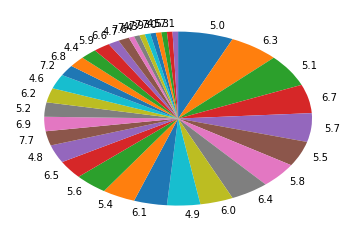

In [158]:
# sepal_lengthの各数値の数ごとの円グラフを出した（出題されている問題とは違っていたが残しています）
# value_countsで数値がそれぞれ何個あるか取得 戻り値はSeries
vals = df["sepal_length"].value_counts()
#print(vals.values)
# indexをリセットして新しいデータフレームを作成
df_vals = vals.reset_index()
# indexで見出し名取得
index_array = df_vals["index"]
plt.pie(vals, labels=index_array.values, counterclock=False, startangle=90)
plt.show()

### 6-1 ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する） 

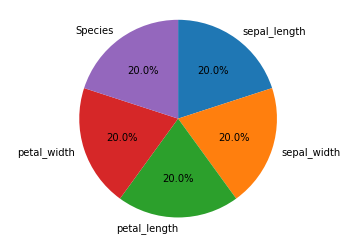

In [159]:
# 下記の形を作るためにデータを取ってくる
#plt.pie([150, 150, 150, 150], labels=["sepal_length", "sepal_width", "petal_length", "petal_width"], autopct="%1.1f%%")

count = df.count()
# 1次元のSeriesでは扱いにくいのでDFにする
df_count = count.reset_index()
# list型に変換
num_array = df_count[0].tolist()
label_array = df_count["index"].tolist()
plt.pie(num_array, labels=label_array, autopct="%1.1f%%", counterclock=False, startangle=90)
# 楕円ではなく円として表示
plt.axis("equal")
plt.show()

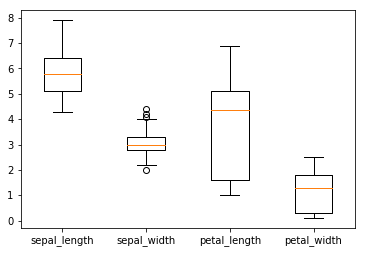

In [160]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
# ["sepal_length", "sepal_width", "petal_length", "petal_width"]
fig = plt.figure()
ax = plt.axes()
#df["sepal_length"].plot.box()
list_sepal_length = []
list_sepal_length.append(df["sepal_length"].tolist())
list_sepal_length.append(df["sepal_width"].tolist())
list_sepal_length.append(df["petal_length"].tolist())
list_sepal_length.append(df["petal_width"].tolist())
ax.boxplot(list_sepal_length, labels=["sepal_length", "sepal_width", "petal_length", "petal_width"])
plt.show()

### 6-2 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

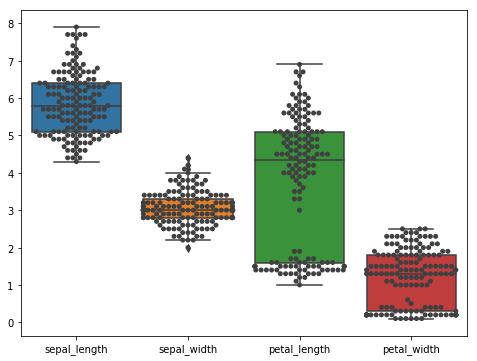

In [161]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
# ["sepal_length", "sepal_width", "petal_length", "petal_width"]
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
sns.boxplot(data=df.iloc[:, :-1])
sns.swarmplot(data=df.iloc[:, :-1], color=".25")
plt.show()

### 6-3 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


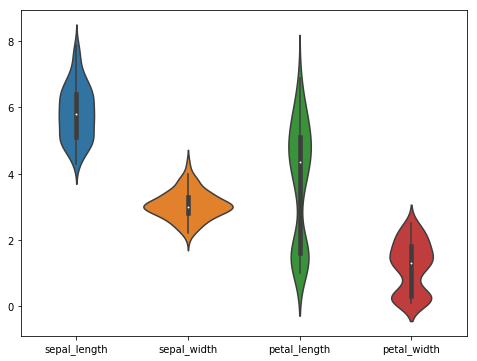

In [162]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
sns.violinplot(data=df.iloc[:, :-1])
plt.show()

- 箱ひげ図とバイオリン図の違い<br>
箱ひげ図は、最小値、最大値、中央値、四分位点がわかる<br>
バイオリン図はデータの分布具合がわかりやすい

## 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る(１つ)

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

### 7-1 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)

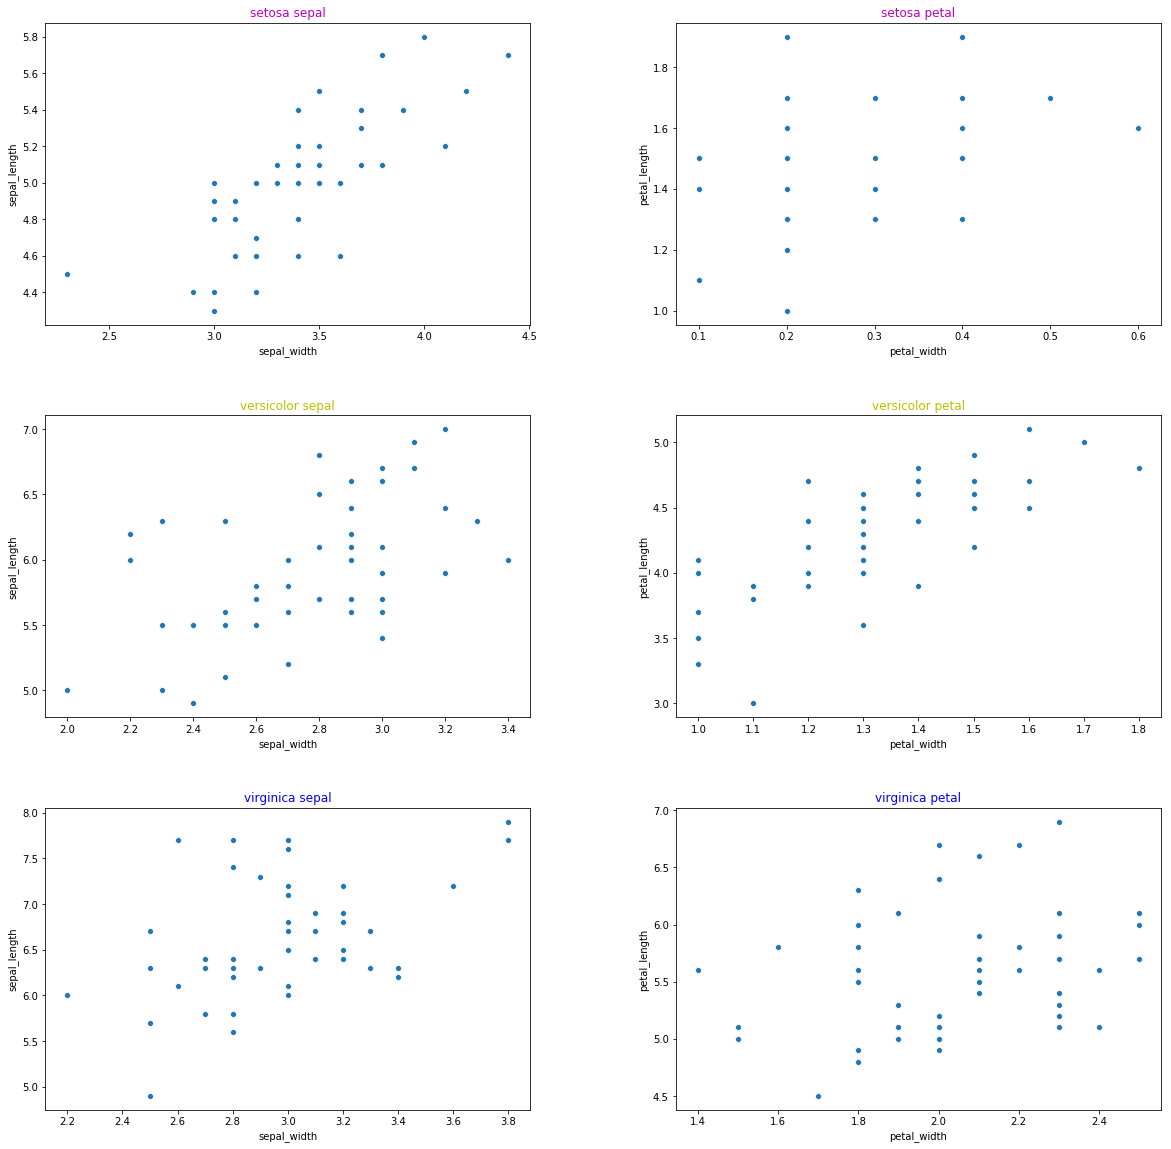

In [224]:
#fig, (ax1, ax2, ax3, ax4, ax5, ax6)  = plt.subplots(3, 2)
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
ax1= fig.add_subplot(3, 2, 1)
#ax.scatter(df.iloc[:50, :])
# 0~49 setosa
# 50~99 versicolor
# 100~149 virginica
# セトカ種のガクの散布図
sns.scatterplot(data=df.iloc[:50, :], x="sepal_width", y="sepal_length", ax=ax1)
ax1.set_title("setosa sepal", color="m")

ax2 = fig.add_subplot(3, 2, 2)
# セトカ種の花弁の散布図
sns.scatterplot(data=df.iloc[:50, :], x="petal_width", y="petal_length", ax=ax2)
ax2.set_title("setosa petal", color="m")

# バージカラー種のガクの散布図
ax3 = fig.add_subplot(3, 2, 3)
sns.scatterplot(data=df.iloc[50:100, :], x="sepal_width", y="sepal_length", ax=ax3)
ax3.set_title("versicolor sepal", color="y")

# バージカラー種の花弁の散布図
ax4 = fig.add_subplot(3, 2, 4)
sns.scatterplot(data=df.iloc[50:100, :], x="petal_width", y="petal_length", ax=ax4)
ax4.set_title("versicolor petal", color="y")

# バージニカ種のガクの散布図
ax5 = fig.add_subplot(3, 2, 5)
sns.scatterplot(data=df.iloc[100:-1, :], x="sepal_width", y="sepal_length", ax=ax5)
ax5.set_title("virginica sepal", color="b")

# バージニカ種の花弁の散布図
ax6 = fig.add_subplot(3, 2, 6)
sns.scatterplot(data=df.iloc[100:-1, :], x="petal_width", y="petal_length", ax=ax6)
ax6.set_title("virginica petal", color="b")

plt.show()

### 7-2 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)

/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invali

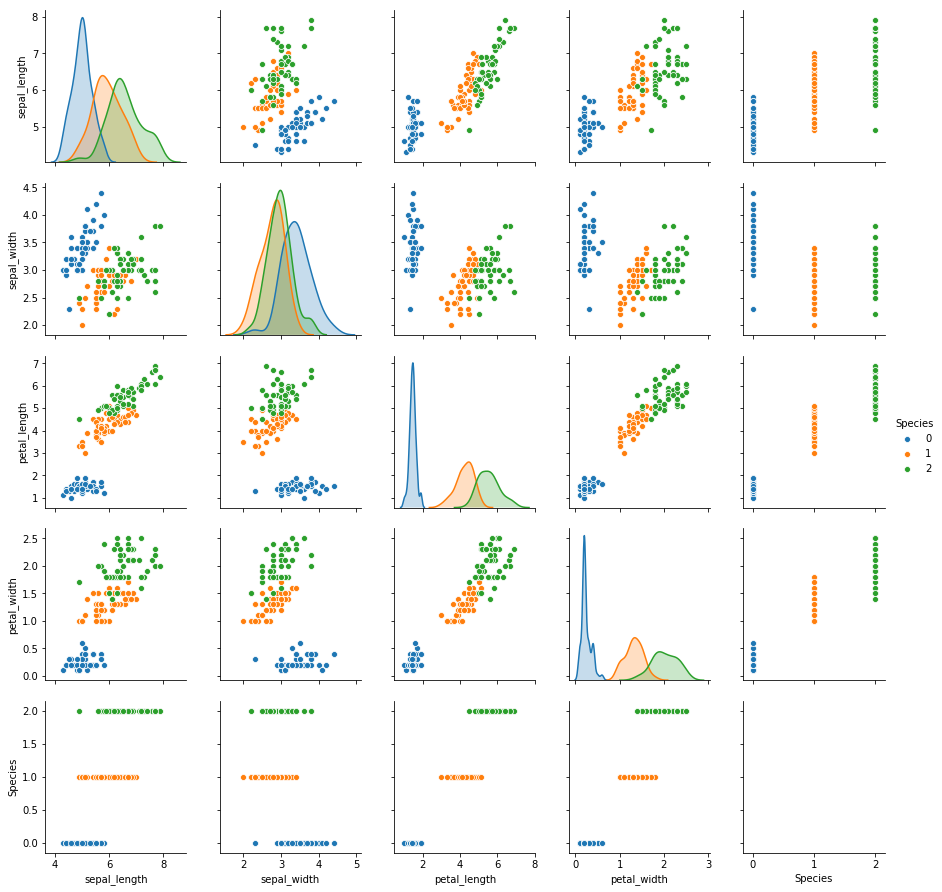

In [261]:
# hue=種類で分けたいラベル名
sns.pairplot(df.iloc[:, :],hue="Species", hue_order=[0, 1, 2])
plt.show()

### 7-3 ４つの特徴量に関する相関係数行列を作る

In [247]:
corr = df.iloc[:, :-1].corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### 7-4 相関係数行列のヒートマップを作る(１つ)

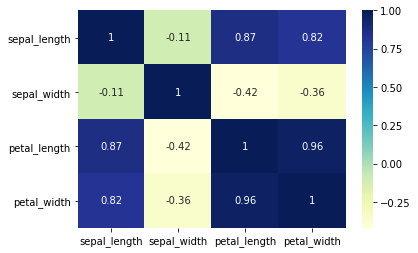

In [251]:
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

## 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。<br>
例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

散布図行列を見ると、セトサ種は他の2種類に比べて、ガク、花弁共にデータが離れているので分類しやすそう<br>
バージカラー種とバージニカ種は花弁には差があるが、ガクにはあまり差がないように見受けられる